In [372]:
#import all modules to be used in this script
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [375]:
#Home Value and Inventory data source: https://www.zillow.com/research/data/
#Cost of Materials data source: https://www.macrotrends.net/
#create dataframe variables for each of the datasets
inv_data = "Metro_invt_fs_uc_sfrcondo_sm_month.csv"
value_data = "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
cost_of_copper = "copper-prices-historical-chart-data.csv"
cost_of_lumber = "lumber-prices-historical-chart-data.csv"

#extract the data from each dataset and store it in the dataframe variable
df_copper = pd.read_csv(cost_of_copper)
df_lumber = pd.read_csv(cost_of_lumber)
df_inv = pd.read_csv(inv_data)
df_value = pd.read_csv(value_data)

#remove all null values 
df_lumber = df_lumber.dropna()
df_copper = df_copper.dropna()
df_lumber 


,date,value
0,1972-11-16,128.4
1,1972-11-17,128.4
2,1972-11-20,128.4
3,1972-11-21,127.0
4,1972-11-27,127.1
...,...,...
12704,2023-04-25,365.1
12705,2023-04-26,348.0
12706,2023-04-27,353.8
12707,2023-04-28,347.2


In [377]:
#convert the date column for each dataframe below to a date data type so we can filter data by date 
df_lumber['date'] = pd.to_datetime(df_lumber['date'])
df_copper['date'] = pd.to_datetime(df_copper['date'])

In [378]:
#create dataframes for cost of materials from year 2000 to present 
df_lumber_post2000 = df_lumber[df_lumber['date'].dt.year >= 2000]
df_copper_post2000 = df_copper[df_copper['date'].dt.year >= 2000]

<AxesSubplot:title={'center':'Cost of Lumber'}, xlabel='Date', ylabel='Dollars'>

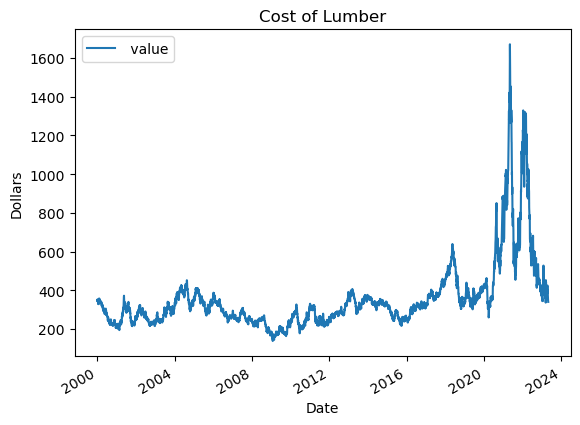

In [379]:
#create a line chart for cost of lumber from year 2000 to present 
df_lumber_post2000.plot(x='date', y=' value', xlabel='Date', ylabel='Dollars', title='Cost of Lumber', kind='line')

<AxesSubplot:title={'center':'Cost of Copper'}, xlabel='Date', ylabel='Dollars Per Pound'>

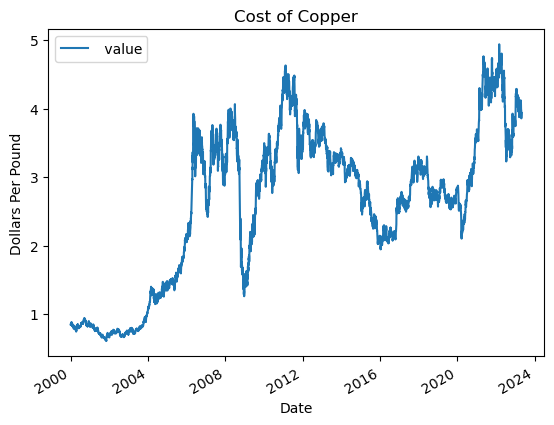

In [380]:
# create a line chart for cost of copper from year 2000 to present
df_copper_post2000.plot(x='date', y=' value', xlabel='Date', ylabel='Dollars Per Pound', title='Cost of Copper', kind='line')

In [381]:
#create dataframes for home inventory each state we are using in our analysis
df_inv_mi = df_inv[df_inv['StateName']=='MI']
df_inv_ca = df_inv[df_inv['StateName'] == 'CA']
df_inv_tx = df_inv[df_inv['StateName'] == 'TX']
df_inv_co = df_inv[df_inv['StateName'] == 'CO']
df_inv_fl = df_inv[df_inv['StateName'] == 'FL']
df_inv_ny = df_inv[df_inv['StateName'] == 'NY']

In [382]:
# create dataframes for home values in each state we are using in our analysis
df_value_mi = df_value[df_value['StateName']=='MI']
df_value_ca = df_value[df_value['StateName'] == 'CA']
df_value_tx = df_value[df_value['StateName'] == 'TX']
df_value_co = df_value[df_value['StateName'] == 'CO']
df_value_fl = df_value[df_value['StateName'] == 'FL']
df_value_ny = df_value[df_value['StateName'] == 'NY']

In [391]:
#rearrange data from wide format to long for "Date" and "Average Home Value" columns to make data easier to filter and apply conditionals
df_unpivoted_value_mi = df_value_mi.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_ca = df_value_ca.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_tx = df_value_tx.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_co = df_value_co.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_fl = df_value_fl.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_ny = df_value_ny.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value = df_value.melt(id_vars=['RegionID', 'SizeRank', 'RegionName','RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')

#verify melt function rearranged data correctly
df_unpivoted_value

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
0,102001,0,United States,country,NaN,2000-01-31,112815.884620
1,394913,1,"New York, NY",msa,NY,2000-01-31,179016.866340
2,753899,2,"Los Angeles, CA",msa,CA,2000-01-31,225229.750975
3,394463,3,"Chicago, IL",msa,IL,2000-01-31,140260.935566
4,394514,4,"Dallas, TX",msa,TX,2000-01-31,128720.957496
...,...,...,...,...,...,...,...
249979,753929,935,"Zapata, TX",msa,TX,2023-03-31,93563.045268
249980,394743,936,"Ketchikan, AK",msa,AK,2023-03-31,391507.867579
249981,753874,937,"Craig, CO",msa,CO,2023-03-31,273270.967248
249982,395188,938,"Vernon, TX",msa,TX,2023-03-31,74251.635936


In [388]:
#convert the "Date" column in our new dataframes to a datetime data type to allow for filtering by date with conditionals 
df_unpivoted_value_mi['Date']=pd.to_datetime(df_unpivoted_value_mi['Date'])
df_unpivoted_value_ca['Date']=pd.to_datetime(df_unpivoted_value_ca['Date'])
df_unpivoted_value_tx['Date']=pd.to_datetime(df_unpivoted_value_tx['Date'])
df_unpivoted_value_co['Date']=pd.to_datetime(df_unpivoted_value_co['Date'])
df_unpivoted_value_fl['Date']=pd.to_datetime(df_unpivoted_value_fl['Date'])
df_unpivoted_value_ny['Date']=pd.to_datetime(df_unpivoted_value_ny['Date'])
df_unpivoted_value['Date']=pd.to_datetime(df_unpivoted_value['Date'])

#verify casting data type for "Date" column to datetime data type worked correctly 
df_unpivoted_value_mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   RegionID             8649 non-null   int64         
 1   SizeRank             8649 non-null   int64         
 2   RegionName           8649 non-null   object        
 3   RegionType           8649 non-null   object        
 4   StateName            8649 non-null   object        
 5   Date                 8649 non-null   datetime64[ns]
 6   Average Home Values  7655 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 473.1+ KB


In [390]:
#create dataframes for each states home value data from 2019 to present to allow for analysis
df_post_covid_value_mi = df_unpivoted_value_mi[df_unpivoted_value_mi['Date'].dt.year>=2019]
df_post_covid_value_ca = df_unpivoted_value_ca[df_unpivoted_value_ca['Date'].dt.year >= 2019]
df_post_covid_value_tx = df_unpivoted_value_tx[df_unpivoted_value_tx['Date'].dt.year >= 2019]
df_post_covid_value_co = df_unpivoted_value_co[df_unpivoted_value_co['Date'].dt.year >= 2019]
df_post_covid_value_fl = df_unpivoted_value_fl[df_unpivoted_value_fl['Date'].dt.year >= 2019]
df_post_covid_value_ny = df_unpivoted_value_ny[df_unpivoted_value_ny['Date'].dt.year >= 2019]
df_post_covid_value = df_unpivoted_value[df_unpivoted_value['Date'].dt.year >= 2019]

#verify dataframes were created correctly
df_post_covid_value_mi
df_post_covid_value_ca
df_post_covid_value_tx
df_post_covid_value_co
df_post_covid_value_fl
df_post_covid_value_ny
df_post_covid_value

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
204288,102001,0,United States,country,NaN,2019-01-31,225064.414430
204289,394913,1,"New York, NY",msa,NY,2019-01-31,434781.132507
204290,753899,2,"Los Angeles, CA",msa,CA,2019-01-31,668426.636176
204291,394463,3,"Chicago, IL",msa,IL,2019-01-31,222137.682633
204292,394514,4,"Dallas, TX",msa,TX,2019-01-31,254146.210666
...,...,...,...,...,...,...,...
249979,753929,935,"Zapata, TX",msa,TX,2023-03-31,93563.045268
249980,394743,936,"Ketchikan, AK",msa,AK,2023-03-31,391507.867579
249981,753874,937,"Craig, CO",msa,CO,2023-03-31,273270.967248
249982,395188,938,"Vernon, TX",msa,TX,2023-03-31,74251.635936


In [393]:
#rearrange data from wide format to long for "Date" and "Total Inventory" columns to make data easier to filter and apply conditionals
df_unpivoted_inv_mi = df_inv_mi.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_ca = df_inv_ca.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_tx = df_inv_tx.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_co = df_inv_co.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_fl = df_inv_fl.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_ny = df_inv_ny.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv = df_inv.melt(id_vars=['RegionID', 'SizeRank', 'RegionName','RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')

#verify melt function rearranged data correctly
df_unpivoted_inv_mi
df_unpivoted_inv_ca
df_unpivoted_inv_tx
df_unpivoted_inv_co
df_unpivoted_inv_fl
df_unpivoted_inv_ny
df_unpivoted_inv

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
0,102001,0,United States,country,NaN,2018-03-31,1421529.0
1,394913,1,"New York, NY",msa,NY,2018-03-31,73707.0
2,753899,2,"Los Angeles, CA",msa,CA,2018-03-31,21998.0
3,394463,3,"Chicago, IL",msa,IL,2018-03-31,38581.0
4,394514,4,"Dallas, TX",msa,TX,2018-03-31,24043.0
...,...,...,...,...,...,...,...
56603,753929,935,"Zapata, TX",msa,TX,2023-03-31,49.0
56604,394743,936,"Ketchikan, AK",msa,AK,2023-03-31,61.0
56605,753874,937,"Craig, CO",msa,CO,2023-03-31,48.0
56606,395188,938,"Vernon, TX",msa,TX,2023-03-31,40.0


In [394]:
#convert the "Date" column in our new inventory dataframes to a datetime data type to allow for filtering by date with conditionals
df_unpivoted_inv_mi['Date']=pd.to_datetime(df_unpivoted_inv_mi['Date'])
df_unpivoted_inv_ca['Date']=pd.to_datetime(df_unpivoted_inv_ca['Date'])
df_unpivoted_inv_tx['Date']=pd.to_datetime(df_unpivoted_inv_tx['Date'])
df_unpivoted_inv_co['Date']=pd.to_datetime(df_unpivoted_inv_co['Date'])
df_unpivoted_inv_fl['Date']=pd.to_datetime(df_unpivoted_inv_fl['Date'])
df_unpivoted_inv_ny['Date']=pd.to_datetime(df_unpivoted_inv_ny['Date'])
df_unpivoted_inv['Date']=pd.to_datetime(df_unpivoted_inv['Date'])

#verify casting data type for "Date" column to datetime data type worked correctly
df_unpivoted_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56608 entries, 0 to 56607
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   RegionID         56608 non-null  int64         
 1   SizeRank         56608 non-null  int64         
 2   RegionName       56608 non-null  object        
 3   RegionType       56608 non-null  object        
 4   StateName        56547 non-null  object        
 5   Date             56608 non-null  datetime64[ns]
 6   Total Inventory  55421 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 3.0+ MB


In [395]:
#create dataframes for each states home inventory data from 2019 to present to allow for analysis
df_post_covid_inv_mi = df_unpivoted_inv_mi[df_unpivoted_inv_mi['Date'].dt.year>=2019]
df_post_covid_inv_ca = df_unpivoted_inv_ca[df_unpivoted_inv_ca['Date'].dt.year >= 2019]
df_post_covid_inv_tx = df_unpivoted_inv_tx[df_unpivoted_inv_tx['Date'].dt.year >= 2019]
df_post_covid_inv_co = df_unpivoted_inv_co[df_unpivoted_inv_co['Date'].dt.year >= 2019]
df_post_covid_inv_fl = df_unpivoted_inv_fl[df_unpivoted_inv_fl['Date'].dt.year >= 2019]
df_post_covid_inv_ny = df_unpivoted_inv_ny[df_unpivoted_inv_ny['Date'].dt.year >= 2019]
df_post_covid_inv = df_unpivoted_inv[df_unpivoted_inv['Date'].dt.year >= 2019]

#verify dataframes were created correctly
df_post_covid_inv_mi
df_post_covid_inv_ca
df_post_covid_inv

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
9280,102001,0,United States,country,NaN,2019-01-31,1452603.0
9281,394913,1,"New York, NY",msa,NY,2019-01-31,76678.0
9282,753899,2,"Los Angeles, CA",msa,CA,2019-01-31,26635.0
9283,394463,3,"Chicago, IL",msa,IL,2019-01-31,38250.0
9284,394514,4,"Dallas, TX",msa,TX,2019-01-31,27727.0
...,...,...,...,...,...,...,...
56603,753929,935,"Zapata, TX",msa,TX,2023-03-31,49.0
56604,394743,936,"Ketchikan, AK",msa,AK,2023-03-31,61.0
56605,753874,937,"Craig, CO",msa,CO,2023-03-31,48.0
56606,395188,938,"Vernon, TX",msa,TX,2023-03-31,40.0


Text(0.5, 1.0, 'Home Inventory')

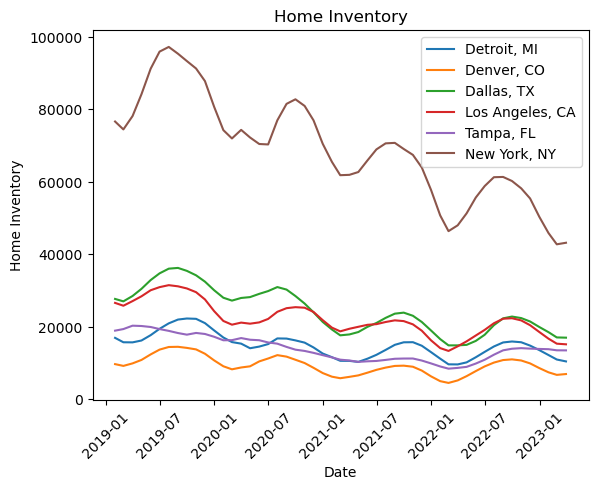

In [400]:
#create a single line chart that displays home inventory trends for each city included in our analysis

#first create a variable that contains a list of all the cities we would like to include in our line chart
cities_list=["Detroit, MI", "Denver, CO", "Dallas, TX", "Los Angeles, CA", "Tampa, FL", "New York, NY"]

#then create a dataframe that stores all the data for the cities we defined in our city list variable above
df_post_covid_inv_combined = df_post_covid_inv[df_post_covid_inv['RegionName'].isin(cities_list)]

#verify the dataframe was created correctly 
#df_post_covid_inv_combined

#loop through all cities defined above and plot the inventory for each city on a line graph for 2019-present
fig, ax = plt.subplots()
for x in cities_list:
    final_data_inv = df_post_covid_inv[df_post_covid_inv['RegionName'] == x]
    ax.plot(final_data_inv['Date'], final_data_inv['Total Inventory'])

#add a legend, x & y lables, rotate x axis lable 45 degrees, add title to chart
plt.legend(cities_list)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Home Inventory')
plt.title('Home Inventory')

Text(0.5, 1.0, 'Change in Home Value')

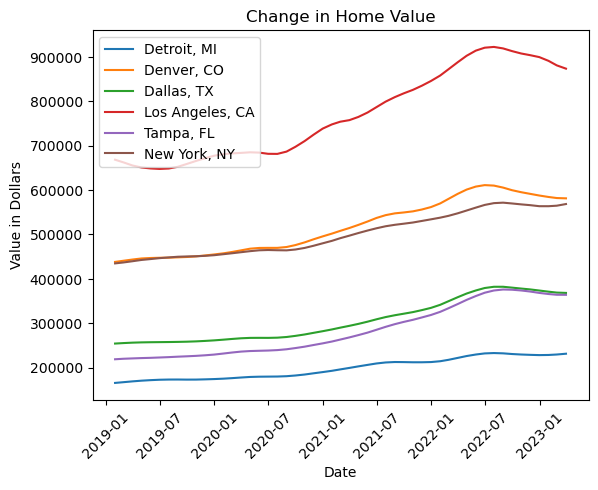

In [401]:
#loop through all cities defined above and plot the change in avergae home value for each city on a line graph for 2019-present
fig,ax=plt.subplots()
for x in cities_list:
    final_data = df_post_covid_value[df_post_covid_value['RegionName']== x]
    ax.plot(final_data['Date'], final_data['Average Home Values'])

#add a legend, x & y lables, rotate x axis lable 45 degrees, add title to chart
plt.legend(cities_list)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Value in Dollars')
plt.title('Change in Home Value')

In [402]:
#create dataframes for home inventory post COVID for each city in our analysis
df_post_covid_inv_detroit = df_post_covid_inv_mi[df_post_covid_inv_mi['RegionName']=="Detroit, MI"]
df_post_covid_inv_la = df_post_covid_inv_ca[df_post_covid_inv_ca['RegionName'] == "Los Angeles, CA"]
df_post_covid_inv_dallas = df_post_covid_inv_tx[df_post_covid_inv_tx['RegionName'] == "Dallas, TX"]
df_post_covid_inv_denver = df_post_covid_inv_co[df_post_covid_inv_co['RegionName'] == "Denver, CO"]
df_post_covid_inv_tampa = df_post_covid_inv_fl[df_post_covid_inv_fl['RegionName'] == "Tampa, FL"]
df_post_covid_inv_newyork = df_post_covid_inv_ny[df_post_covid_inv_ny['RegionName'] == "New York, NY"]

#verify dataframes were craeted correctly
df_post_covid_inv_detroit
df_post_covid_inv_la
df_post_covid_inv_dallas
df_post_covid_inv_denver

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
170,394530,19,"Denver, CO",msa,CO,2019-01-31,9739.0
187,394530,19,"Denver, CO",msa,CO,2019-02-28,9249.0
204,394530,19,"Denver, CO",msa,CO,2019-03-31,9945.0
221,394530,19,"Denver, CO",msa,CO,2019-04-30,10894.0
238,394530,19,"Denver, CO",msa,CO,2019-05-31,12422.0
255,394530,19,"Denver, CO",msa,CO,2019-06-30,13742.0
272,394530,19,"Denver, CO",msa,CO,2019-07-31,14466.0
289,394530,19,"Denver, CO",msa,CO,2019-08-31,14518.0
306,394530,19,"Denver, CO",msa,CO,2019-09-30,14218.0
323,394530,19,"Denver, CO",msa,CO,2019-10-31,13802.0


<AxesSubplot:title={'center':'Home Inventory New York'}, xlabel='Date', ylabel='Home Inventory'>

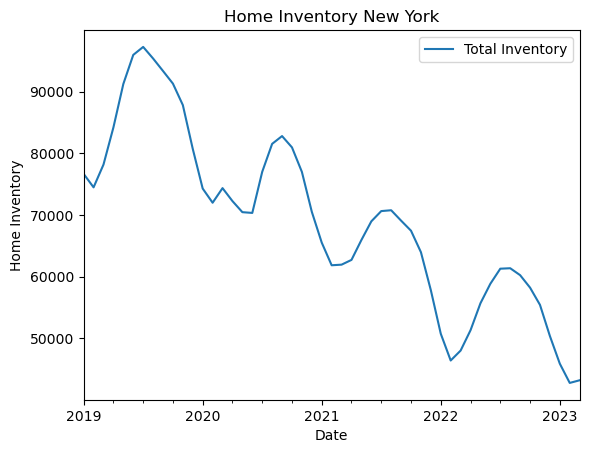

In [403]:
#plot New York City inventory post COVID data on a line graph
df_post_covid_inv_newyork.plot(x='Date', y='Total Inventory', xlabel='Date', ylabel='Home Inventory', title='Home Inventory New York', kind='line')

<AxesSubplot:title={'center':'Home Inventory Tampa'}, xlabel='Date', ylabel='Home Inventory'>

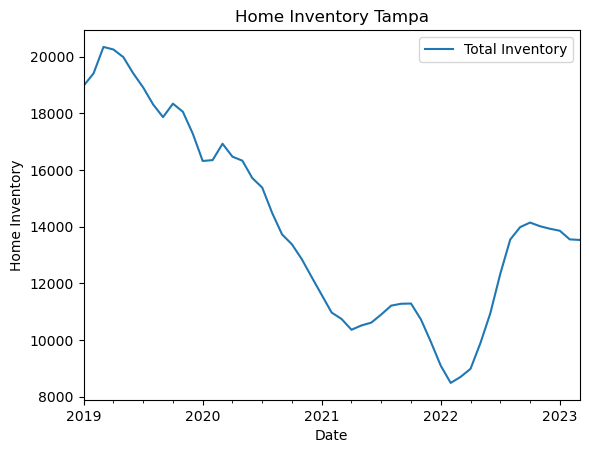

In [404]:
#plot Tampa inventory post COVID data on a line graph
df_post_covid_inv_tampa.plot(x='Date', y='Total Inventory', xlabel='Date', ylabel='Home Inventory', title='Home Inventory Tampa', kind='line')

<AxesSubplot:title={'center':'Home Inventory Detroit'}, xlabel='Date', ylabel='Home Inventory'>

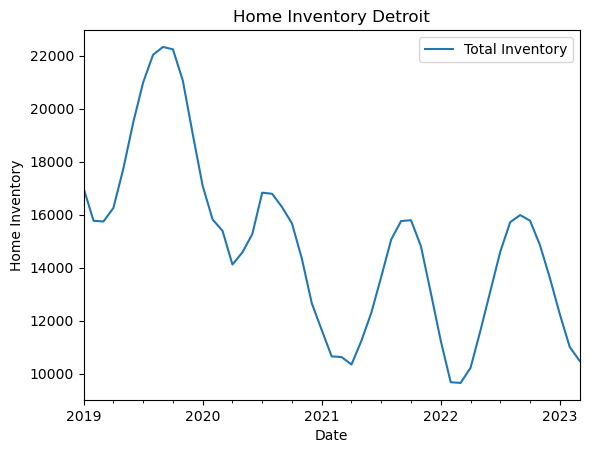

In [405]:
#plot Detroit inventory post COVID data on a line graph
df_post_covid_inv_detroit.plot(x='Date', y='Total Inventory',xlabel='Date', ylabel='Home Inventory', title='Home Inventory Detroit', kind='line')

<AxesSubplot:title={'center':'Home Inventory Los Angeles'}, xlabel='Date', ylabel='Home Inventory'>

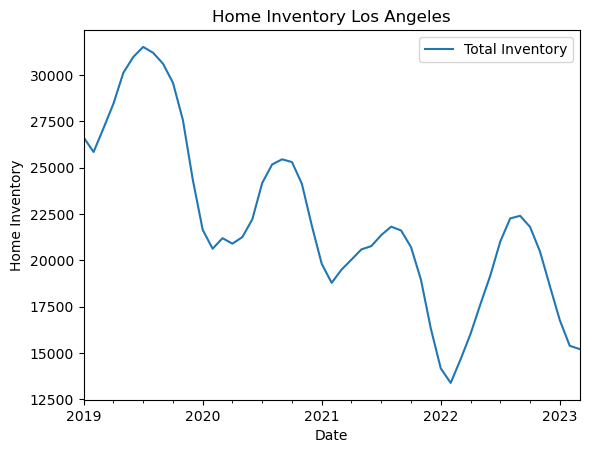

In [406]:
#plot Los Angeles inventory post COVID data on a line graph
df_post_covid_inv_la.plot(x='Date', y='Total Inventory', xlabel='Date', ylabel='Home Inventory', title='Home Inventory Los Angeles', kind='line')

<AxesSubplot:title={'center':'Home Inventory Dallas'}, xlabel='Date', ylabel='Home Inventory'>

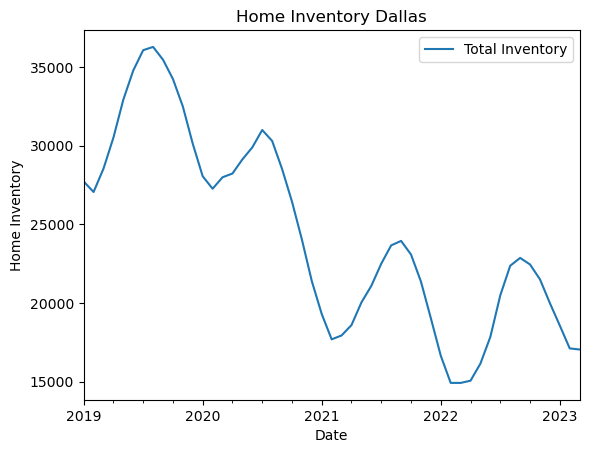

In [407]:
# plot Dallas inventory post COVID data on a line graph
df_post_covid_inv_dallas.plot(x='Date', y='Total Inventory', xlabel='Date', ylabel='Home Inventory', title='Home Inventory Dallas', kind='line')

<AxesSubplot:title={'center':'Home Inventory Denver'}, xlabel='Date', ylabel='Home Inventory'>

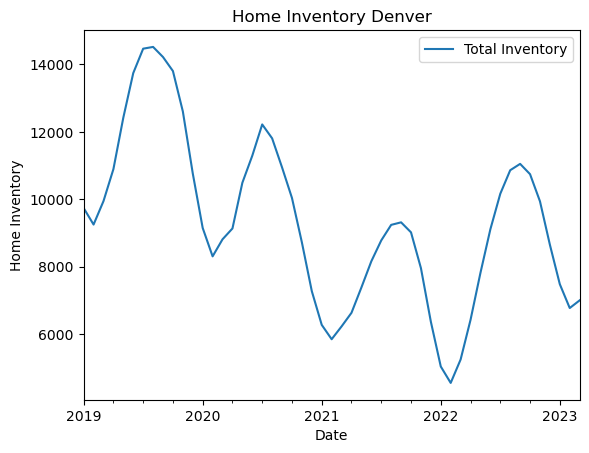

In [360]:
# plot Denver inventory post COVID data on a line graph
df_post_covid_inv_denver.plot(x='Date', y='Total Inventory', xlabel='Date', ylabel='Home Inventory', title='Home Inventory Denver', kind='line')

In [408]:
#create dataframes for average home values post COVID for each city in our analysis
df_post_covid_value_detroit = df_post_covid_value_mi[df_post_covid_value_mi['RegionName'] == "Detroit, MI"]
df_post_covid_value_la = df_post_covid_value_ca[df_post_covid_value_ca['RegionName']== "Los Angeles, CA"]
df_post_covid_value_dallas = df_post_covid_value_tx[df_post_covid_value_tx['RegionName'] == "Dallas, TX"]
df_post_covid_value_denver = df_post_covid_value_co[df_post_covid_value_co['RegionName'] == "Denver, CO"]
df_post_covid_value_tampa = df_post_covid_value_fl[df_post_covid_value_fl['RegionName'] == "Tampa, FL"]
df_post_covid_value_newyork = df_post_covid_value_ny[df_post_covid_value_ny['RegionName'] == "New York, NY"]

#verify dataframes were created correctly
df_post_covid_value_detroit
df_post_covid_value_la
df_post_covid_value_dallas
df_post_covid_value_denver

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
3876,394530,19,"Denver, CO",msa,CO,2019-01-31,438137.861906
3893,394530,19,"Denver, CO",msa,CO,2019-02-28,440706.229763
3910,394530,19,"Denver, CO",msa,CO,2019-03-31,443521.586199
3927,394530,19,"Denver, CO",msa,CO,2019-04-30,445897.963798
3944,394530,19,"Denver, CO",msa,CO,2019-05-31,446944.921690
3961,394530,19,"Denver, CO",msa,CO,2019-06-30,447469.385551
3978,394530,19,"Denver, CO",msa,CO,2019-07-31,447707.209303
3995,394530,19,"Denver, CO",msa,CO,2019-08-31,448428.016380
4012,394530,19,"Denver, CO",msa,CO,2019-09-30,449220.317428
4029,394530,19,"Denver, CO",msa,CO,2019-10-31,450639.061205


<AxesSubplot:title={'center':'Home Values New York City'}, xlabel='Date', ylabel='Home Values'>

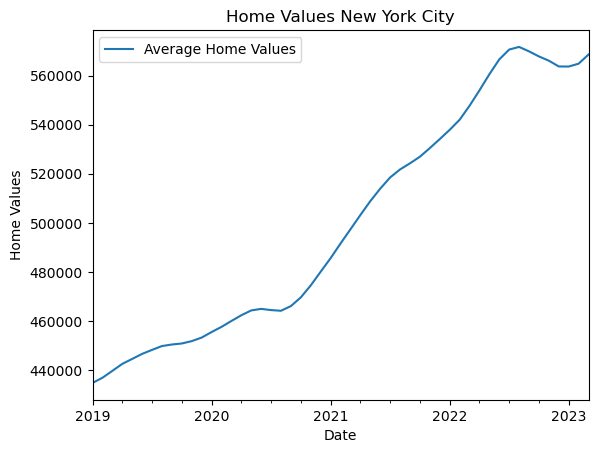

In [409]:
#plot New York City average home values post COVID data on a line graph
df_post_covid_value_newyork.plot(x='Date', y='Average Home Values', xlabel='Date', ylabel='Home Values', title='Home Values New York City', kind='line')

<AxesSubplot:title={'center':'Home Values Tampa'}, xlabel='Date', ylabel='Home Values'>

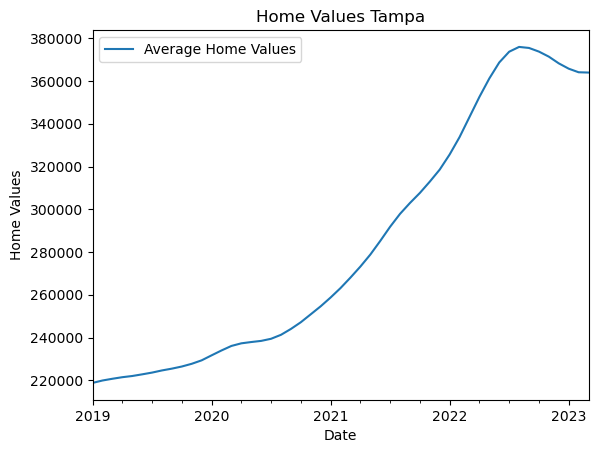

In [410]:
#plot Tampa average home values post COVID data on a line graph
df_post_covid_value_tampa.plot(x='Date', y='Average Home Values', xlabel='Date', ylabel='Home Values', title='Home Values Tampa', kind='line')

<AxesSubplot:title={'center':'Home Values Detroit'}, xlabel='Date', ylabel='Home Values'>

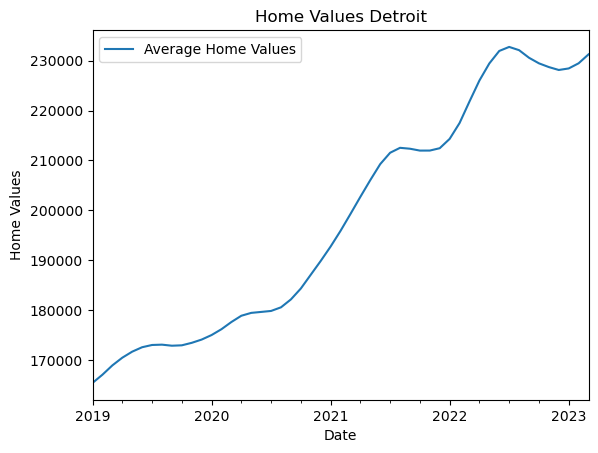

In [363]:
#plot Detroit average home values post COVID data on a line graph
df_post_covid_value_detroit.plot(x='Date', y='Average Home Values', xlabel='Date', ylabel='Home Values', title='Home Values Detroit', kind='line')

<AxesSubplot:title={'center':'Home Values Los Angeles'}, xlabel='Date', ylabel='Home Values'>

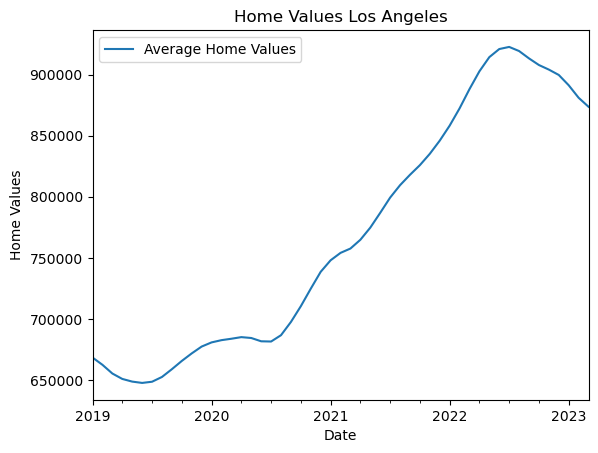

In [411]:
#plot Los Angeles average home values post COVID data on a line graph
df_post_covid_value_la.plot(x='Date', y='Average Home Values', xlabel='Date', ylabel='Home Values', title='Home Values Los Angeles', kind='line')

<AxesSubplot:title={'center':'Home Values Dallas'}, xlabel='Date', ylabel='Home Values'>

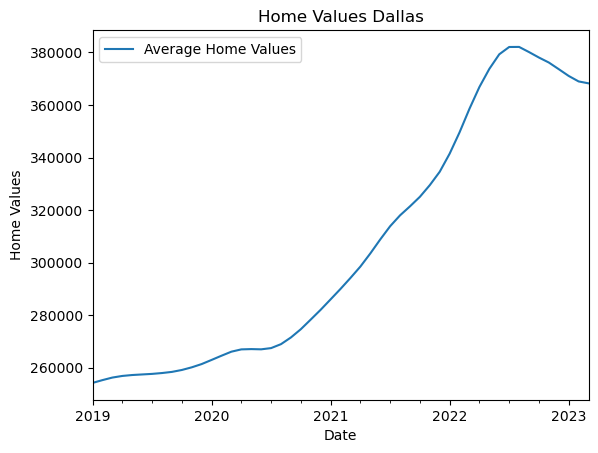

In [412]:
#plot Dallas average home values post COVID data on a line graph
df_post_covid_value_dallas.plot(x='Date', y='Average Home Values', xlabel='Date', ylabel='Home Values', title='Home Values Dallas',kind='line')

<AxesSubplot:title={'center':'Home Values Denver'}, xlabel='Date', ylabel='Home Values'>

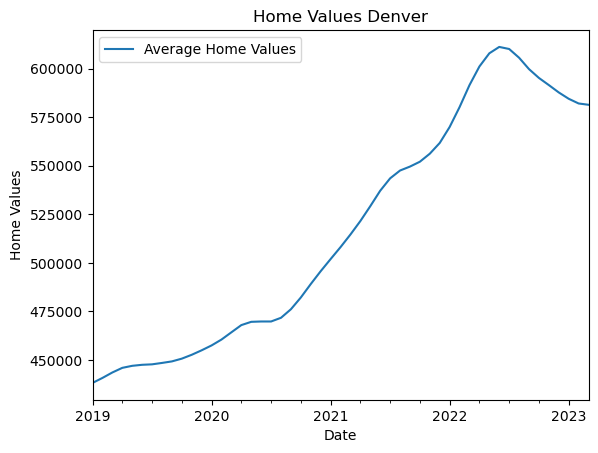

In [413]:
#plot Denver average home values post COVID data on a line graph
df_post_covid_value_denver.plot(x='Date', y='Average Home Values', xlabel='Date', ylabel='Home Values', title='Home Values Denver', kind='line')